# Метод оптимизации Нелдера — Мида

In [42]:
arr = []

In [43]:
class Vector(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return "({0}, {1})".format(self.x, self.y)

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        return Vector(x, y)

    def __rmul__(self, other):
        x = self.x * other
        y = self.y * other
        return Vector(x, y)

    def __truediv__(self, other):
        x = self.x / other
        y = self.y / other
        return Vector(x, y)

    def c(self):
        return (self.x, self.y)
        
# objective function
def f(point):
    x, y = point
    return (1-x)**2 + 100*(y-x**x)**2

In [45]:
def nelder_mead(alpha=1, beta=0.5, gamma=2, maxiter=30):
    
    v1 = Vector(10, 10)
    v2 = Vector(5.0, 5.0)
    v3 = Vector(0, 1.0)

    for i in range(maxiter):
        adict = {v1:f(v1.c()), v2:f(v2.c()), v3:f(v3.c())}
        points = sorted(adict.items(), key=lambda x: x[1])
        
        b = points[0][0]
        g = points[1][0]
        w = points[2][0]
        
        
        mid = (g + b)/2

        # Отражение
        xr = mid + alpha * (mid - w)
        if f(xr.c()) < f(g.c()):
            w = xr
        else:
            if f(xr.c()) < f(w.c()):
                w = xr
            c = (w + mid)/2
            if f(c.c()) < f(w.c()):
                w = c
        if f(xr.c()) < f(b.c()):

            # Растяжение
            xe = mid + gamma * (xr - mid)
            if f(xe.c()) < f(xr.c()):
                w = xe
            else:
                w = xr
        if f(xr.c()) > f(g.c()):
            
            # Сжатие
            xc = mid + beta * (w - mid)
            if f(xc.c()) < f(w.c()):
                w = xc

        v1 = w
        v2 = g
        v3 = b
        
        arr.append((v1,v2,v3))
        
        print(b)
    return b

In [46]:
print("Result of Nelder-Mead algorithm: ")
xk = nelder_mead()
print("Best poits is: %s"%(xk))

Result of Nelder-Mead algorithm: 
(0, 1.0)


TypeError: '<' not supported between instances of 'complex' and 'float'

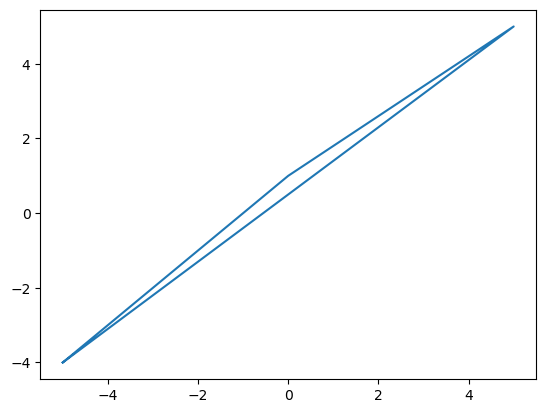

In [47]:
import matplotlib.pyplot as plt

for elem in arr:
    x = []
    y = []
    for test in elem:
        x.append(test.x)
        y.append(test.y)
    
    x.append(x[0])
    y.append(y[0])
    
    plt.plot(x,y)
    
    x = []
    y = []

plt.show()